In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## LogReg baseline

In [2]:
baseline1 = pd.read_csv("LogReg_baseline_500.csv")
baseline2 = pd.read_csv("LogReg_baseline_1000.csv")

In [3]:
baseline1 = baseline1.mean(axis=0)

In [4]:
baseline2 = baseline2.mean(axis=0)

## Read in data (Shekhar)

In [5]:
part1 = pd.read_csv("equal_oppo_Shekhar.csv")
part2 = pd.read_csv('../Ruoyu/tmp_result/Shekhar_0.4 to 1_Equal_opportunity.csv')
part2.columns = ["index", "p","checkpoint","test error","demographic parity","equal_opportunity","equal odds","overall accuracy violation"]
part1.columns = ["index", "p","checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]

In [6]:
part1 = part1.loc[part1['p'] <= 0.5]
part2 = part2.loc[part2['p'] > 0.5]

In [7]:
whole = part1.append(part2)

In [8]:
check_500 = whole.loc[whole['checkpoint'] == 500]
check_1000 = whole.loc[whole['checkpoint'] == 1000]

## Shekhar optimizing equal opportunity (500 sample)

In [9]:
df = []
# df.columns = ["index", "p","checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]
for i in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
    temp = check_500.loc[np.abs(check_500['p'] - i) < 1e-8].values[:, 2:]
    df.append(np.mean(temp, axis=0))

In [10]:
df = pd.DataFrame(df)

In [11]:
df.columns = ["checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]

In [12]:
sort = df.sort_values("test error")

In [13]:
test_error_frontier = [sort['test error'].iloc[0]]
equal_opportunity_frontier = [sort['equal_opportunity'].iloc[0]]

In [14]:
index = [0]
for i in range(1, 21):
    if sort['equal_opportunity'].iloc[i] < equal_opportunity_frontier[-1]:
        index.append(i)
        equal_opportunity_frontier.append(sort['equal_opportunity'].iloc[i])
        test_error_frontier.append(sort['test error'].iloc[i])

Text(0, 0.5, 'equal_opportunity violation')

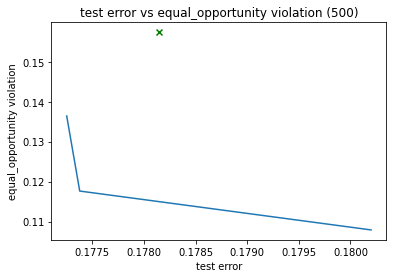

In [15]:
plt.plot(test_error_frontier, equal_opportunity_frontier)
plt.scatter(baseline1.loc["test error"], baseline1.loc["equal_opportunity"], marker='x', c="g")
plt.title("test error vs equal_opportunity violation (500)")
plt.xlabel("test error")
plt.ylabel("equal_opportunity violation")

In [16]:
df = sort.iloc[index]

In [17]:
df

,checkpoint,test error,demographic parity,equal odds,equal_opportunity,overall accuracy violation
13,500.0,0.177251,0.202991,0.202991,0.136434,0.196374
9,500.0,0.177377,0.173697,0.202477,0.117629,0.128043
2,500.0,0.180199,0.155032,0.172722,0.107898,0.130057


In [18]:
test_error_frontier = [df['test error'].iloc[0]]
demographic_frontier = [df['demographic parity'].iloc[0]]
for i in range(len(index)):
    if df['demographic parity'].iloc[i] < demographic_frontier[-1]:
        demographic_frontier.append(df['demographic parity'].iloc[i])
        test_error_frontier.append(df['test error'].iloc[i])

Text(0, 0.5, 'demographic parity violation')

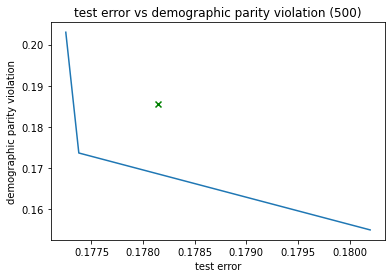

In [19]:
plt.plot(test_error_frontier, demographic_frontier)
plt.scatter(baseline1.loc["test error"], baseline1.loc["demographic parity"], marker='x', c="g")
plt.title("test error vs demographic parity violation (500)")
plt.xlabel("test error")
plt.ylabel("demographic parity violation")

Text(0, 0.5, 'equal odds violation')

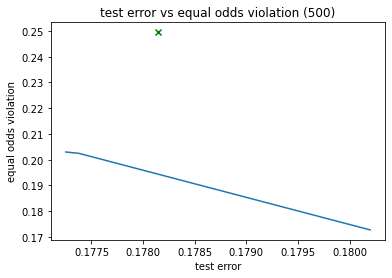

In [20]:
test_error_frontier = [df['test error'].iloc[0]]
equal_odds_frontier = [df['equal odds'].iloc[0]]
for i in range(len(index)):
    if df['equal odds'].iloc[i] < equal_odds_frontier[-1]:
        equal_odds_frontier.append(df['equal odds'].iloc[i])
        test_error_frontier.append(df['test error'].iloc[i])
        
plt.plot(test_error_frontier, equal_odds_frontier)
plt.scatter(baseline1.loc["test error"], baseline1.loc["equal odds"], marker='x', c="g")
plt.title("test error vs equal odds violation (500)")
plt.xlabel("test error")
plt.ylabel("equal odds violation")

Text(0, 0.5, 'overall accuracy violation')

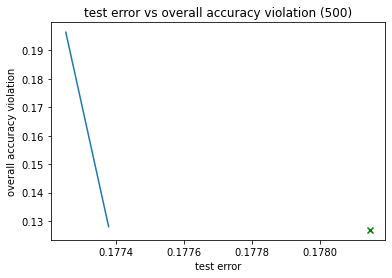

In [21]:
test_error_frontier = [df['test error'].iloc[0]]
overall_acc_frontier = [df['overall accuracy violation'].iloc[0]]
for i in range(len(index)):
    if df['overall accuracy violation'].iloc[i] < overall_acc_frontier[-1]:
        overall_acc_frontier.append(df['overall accuracy violation'].iloc[i])
        test_error_frontier.append(df['test error'].iloc[i])
        
plt.plot(test_error_frontier, overall_acc_frontier)
plt.scatter(baseline1.loc["test error"], baseline1.loc["overall accuracy violation"], marker='x', c="g")
plt.title("test error vs overall accuracy violation (500)")
plt.xlabel("test error")
plt.ylabel("overall accuracy violation")

## Abernethy optimizing 01 loss (1000 sample)

In [22]:
df = []
# df.columns = ["index", "p","checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]
for i in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
    temp = check_1000.loc[np.abs(check_1000['p'] - i) < 1e-8].values[:, 2:]
    df.append(np.mean(temp, axis=0))

In [23]:
df = pd.DataFrame(df)
df.columns = ["checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]

In [24]:
sort = df.sort_values("test error")

In [25]:
test_error_frontier = [sort['test error'].iloc[0]]
equal_opportunity_frontier = [sort['equal_opportunity'].iloc[0]]

Text(0, 0.5, 'equal_opportunity violation')

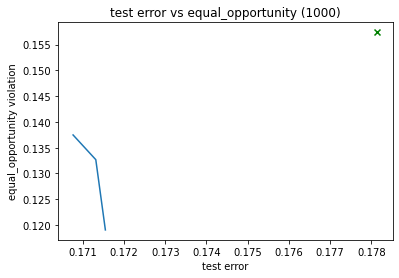

In [26]:
index = [0]
for i in range(1, 21):
    if sort['equal_opportunity'].iloc[i] < equal_opportunity_frontier[-1]:
        index.append(i)
        equal_opportunity_frontier.append(sort['equal_opportunity'].iloc[i])
        test_error_frontier.append(sort['test error'].iloc[i])
plt.plot(test_error_frontier, equal_opportunity_frontier)
plt.scatter(baseline1.loc["test error"], baseline1.loc["equal_opportunity"], marker='x', c="g")
plt.title("test error vs equal_opportunity (1000)")
plt.xlabel("test error")
plt.ylabel("equal_opportunity violation")

In [27]:
df = sort.iloc[index]

Text(0, 0.5, 'demographic parity violation')

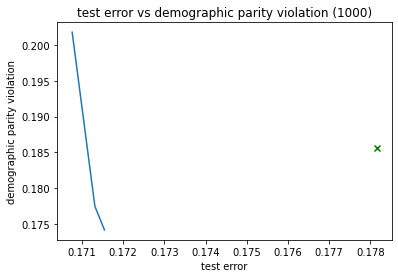

In [28]:
test_error_frontier = [df['test error'].iloc[0]]
demographic_frontier = [df['demographic parity'].iloc[0]]
for i in range(len(index)):
    if df['demographic parity'].iloc[i] < demographic_frontier[-1]:
        demographic_frontier.append(df['demographic parity'].iloc[i])
        test_error_frontier.append(df['test error'].iloc[i])
plt.plot(test_error_frontier, demographic_frontier)
plt.scatter(baseline1.loc["test error"], baseline1.loc["demographic parity"], marker='x', c="g")
plt.title("test error vs demographic parity violation (1000)")
plt.xlabel("test error")
plt.ylabel("demographic parity violation")

Text(0, 0.5, 'equal odds violation')

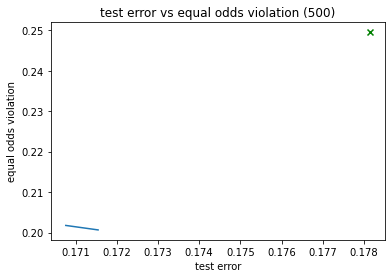

In [29]:
test_error_frontier = [df['test error'].iloc[0]]
equal_odds_frontier = [df['equal odds'].iloc[0]]
for i in range(len(index)):
    if df['equal odds'].iloc[i] < equal_odds_frontier[-1]:
        equal_odds_frontier.append(df['equal odds'].iloc[i])
        test_error_frontier.append(df['test error'].iloc[i])
        
plt.plot(test_error_frontier, equal_odds_frontier)
plt.scatter(baseline1.loc["test error"], baseline1.loc["equal odds"], marker='x', c="g")
plt.title("test error vs equal odds violation (500)")
plt.xlabel("test error")
plt.ylabel("equal odds violation")

Text(0, 0.5, 'overall accuracy violation')

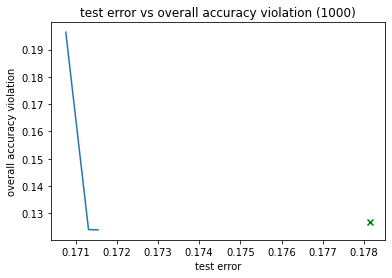

In [30]:
test_error_frontier = [df['test error'].iloc[0]]
overall_acc_frontier = [df['overall accuracy violation'].iloc[0]]
for i in range(len(index)):
    if df['equal_opportunity'].iloc[i] < overall_acc_frontier[-1]:
        overall_acc_frontier.append(df['overall accuracy violation'].iloc[i])
        test_error_frontier.append(df['test error'].iloc[i])
        
plt.plot(test_error_frontier, overall_acc_frontier)
plt.scatter(baseline1.loc["test error"], baseline1.loc["overall accuracy violation"], marker='x', c="g")
plt.title("test error vs overall accuracy violation (1000)")
plt.xlabel("test error")
plt.ylabel("overall accuracy violation")